## Read Data

In [554]:
import pandas as pd

df = pd.read_csv('USD_INR Historical Data2.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,09/20/2023,83.238,83.202,83.846,83.164,NaN,-0.09%
1,09/19/2023,83.310,83.250,83.344,83.170,NaN,0.05%
2,09/18/2023,83.270,83.106,83.360,83.085,NaN,0.24%
3,09/15/2023,83.069,83.063,83.202,82.981,NaN,0.07%
4,09/14/2023,83.010,82.915,83.101,82.913,NaN,0.09%


In [555]:
df.shape

(709, 7)

In [556]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %     object
dtype: object

## Preprocessing

In [557]:
df['Date'] = pd.to_datetime(df['Date'])

In [558]:
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %            object
dtype: object

In [559]:
df.describe()

,Price,Open,High,Low,Vol.
count,709.000000,709.000000,709.000000,709.000000,0.0
mean,77.873178,77.859629,78.040807,77.716810,NaN
std,3.770792,3.770455,3.776571,3.773495,NaN
min,72.380000,72.342000,72.475000,72.268000,NaN
25%,74.385000,74.383000,74.532000,74.254000,NaN
50%,77.415000,77.418000,77.548000,77.243000,NaN
75%,81.982000,81.982000,82.125000,81.869000,NaN
max,83.310000,83.250000,83.846000,83.177000,NaN


In [560]:
df =  df.drop('Vol.',axis=1)

## Data visualization

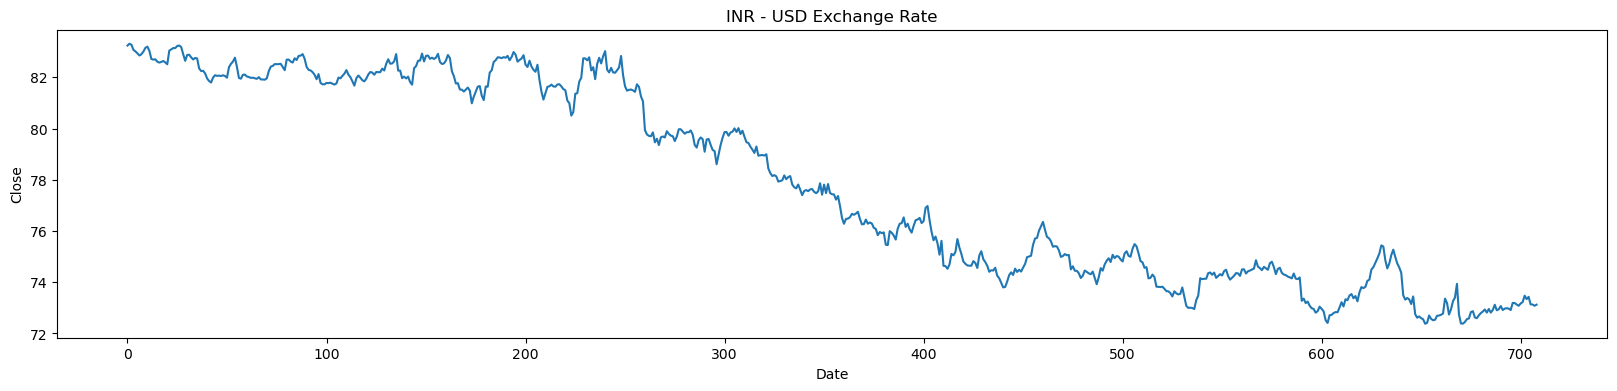

In [561]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df["Price"])
plt.show()

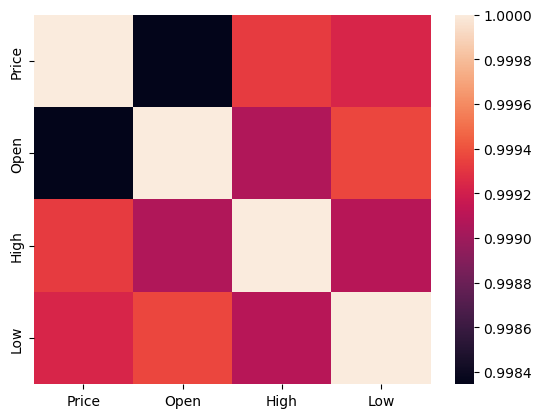

In [562]:
import seaborn as sns
sns.heatmap(df.corr())
plt.show()

## Set [ data train , data test ]

In [563]:
x = df[["Open", "High", "Low"]]
y = df["Price"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [564]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=.2,random_state=43,shuffle=False)

## Set up [ Decision Tree ] models

In [661]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion = 'absolute_error',max_features = 'auto')

In [662]:
model.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_features='auto')

In [663]:
ypred = model.predict(xtest)

## Set up DataFrame for [ predictions ]

In [664]:
data_pre = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
data_pre.head()

,Predicted Rate
0,74.823
1,74.565
2,74.427
3,74.502
4,74.530


In [665]:
data_pre.shape

(142, 1)

## Evaluate by [ R2 score & MSE ]

In [666]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_test = r2_score(data_pre.values.reshape(-1,1),ytest.reshape(-1,1))
loss_test = mean_squared_error(data_pre.values.reshape(-1,1),ytest.reshape(-1,1))

print(f'r2_test : {round(r2_test*100,1)} %')
print(f'loss_test : {round(loss_test,2)} ')

r2_test : 91.1 %
loss_test : 0.05 


### Evaluate in real world

In [667]:
# visti ' https://www.investing.com/currencies/usd-inr-historical-data ' to get data and compare betwwen it and predicted values
real = {
    'date' : '09/19/2023',
    'open' : 83.250 ,
    'high' : 83.344,
    'low'  : 83.170 ,
    'close': 83.310,
}
real_data = [ real['open'] , real['high'] , real['low']  ]

In [668]:
pred_close = model.predict([real_data])[0]
dlta = pred_close - real['close']
dlta = round(dlta ,3 )

print('pred_real : ', pred_close)
print('dlta : ' ,dlta )

pred_real :  83.31
dlta :  0.0


## Save model

In [671]:
import joblib
file_path = 'Model -- Currency exchange rate prediction --.pkl'
joblib.dump(model, file_path)

['Model -- Currency exchange rate prediction --.pkl']

## Load model

In [672]:
import joblib
file_path = 'Model -- Currency exchange rate prediction --.pkl'

loaded_model = joblib.load(file_path)

In [674]:
print(loaded_model.predict([real_data])[0])

83.31


In [689]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}